In [62]:
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [74]:
import importlib
import sys
sys.path.insert(0, '../utils')
import data_utils
import visualization
import evaluation

importlib.reload(visualization)
importlib.reload(evaluation)

sys.path.insert(0, '../models')
import log_reg_word_embeddings_all

<module 'visualization' from '../utils/visualization.py'>

<module 'evaluation' from '../utils/evaluation.py'>

In [41]:
NAME = 'LogRegAll_CW'

In [3]:
df_train = data_utils.load_data_set('../data/train/train.csv')
df_train_x = df_train[['head.word', 'tail.word', 'sentence']]
df_train_y = df_train['relation']

In [4]:
model = log_reg_word_embeddings_all.LogRegWordEmbeddingsAll()

In [5]:
model.fit(df_train_x, df_train_y)

Tokenizing head.words, tail.words and sentences...
    head.word         tail.word  \
0  [syracuse]  [onondaga, lake]   
1  [syracuse]  [onondaga, lake]   
2  [syracuse]  [onondaga, lake]   
3    [turkey]           [adana]   
4    [turkey]           [adana]   

                                            sentence  
0  [she, also, oversaw, refinancing, state, super...  
1  [more, 2, 5, million, cubic, yards, contaminat...  
2  [the, onondaga, nation, 1, 500, members, feder...  
3  [he, born, istanbul, raised, eastern, city, ad...  
4  [by, end, recent, tour, rollins, met, soldiers...  
Averaging word embeddings...
                                           head.word  \
0  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
1  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
2  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
3  [0.090082, -0.021439, -0.200264, 0.084044, 0.1...   
4  [0.090082, -0.021439, -0.200264, 0.084044, 0.1...   

                                          

In [7]:
model.predict_proba(df_train_x.head())

Tokenizing head.words, tail.words and sentences...
    head.word         tail.word  \
0  [syracuse]  [onondaga, lake]   
1  [syracuse]  [onondaga, lake]   
2  [syracuse]  [onondaga, lake]   
3    [turkey]           [adana]   
4    [turkey]           [adana]   

                                            sentence  
0  [she, also, oversaw, refinancing, state, super...  
1  [more, 2, 5, million, cubic, yards, contaminat...  
2  [the, onondaga, nation, 1, 500, members, feder...  
3  [he, born, istanbul, raised, eastern, city, ad...  
4  [by, end, recent, tour, rollins, met, soldiers...  
Averaging word embeddings...
                                           head.word  \
0  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
1  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
2  [-0.03558, 0.18046, 0.052801, -0.058331, -0.12...   
3  [0.090082, -0.021439, -0.200264, 0.084044, 0.1...   
4  [0.090082, -0.021439, -0.200264, 0.084044, 0.1...   

                                          

array([[6.92942584e-10, 6.14926719e-07, 6.13698503e-11, 2.95083839e-04,
        2.05911925e-09, 2.95637336e-05, 6.19744426e-06, 1.01770036e-04,
        9.08702586e-05, 1.11579970e-08, 8.56782008e-04, 5.98649068e-04,
        7.93821397e-01, 2.27725462e-04, 1.65699731e-11, 1.11937842e-04,
        1.50356620e-04, 1.61806361e-04, 3.68261696e-04, 2.20042821e-04,
        2.09840726e-05, 1.45871113e-05, 6.64080670e-05, 2.58573446e-03,
        8.33276500e-04, 3.58475710e-07, 2.46543122e-05, 9.18815072e-02,
        1.37964521e-04, 1.07393452e-01],
       [9.54506173e-10, 2.26144490e-07, 6.96882333e-11, 4.26221335e-04,
        1.34194677e-09, 3.44274670e-05, 1.27690330e-06, 3.77466119e-05,
        6.01558631e-05, 5.79774942e-09, 5.87380393e-04, 4.49106141e-04,
        5.69822855e-01, 1.37460677e-04, 1.90053075e-11, 8.27278973e-05,
        9.54626499e-05, 4.56017393e-05, 2.13074590e-04, 1.15063390e-04,
        2.93088735e-05, 1.08715872e-05, 1.25252591e-04, 1.42273920e-03,
        5.91122546e-04,

In [8]:
import pickle

save_dir = '../trained_models/log_reg_word_embeddings_all.pkl'
with open(save_dir, 'wb') as save_file:
    pickle.dump(model.model, save_file)

In [9]:
with open(save_dir, 'rb') as saved_file:
    loaded_model = pickle.load(saved_file)

In [10]:
loaded_model

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=6, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [8]:
df_test = data_utils.load_data_set('../data/test/test.csv')
df_test_x = df_test[['head.word', 'tail.word', 'sentence']]
df_test_y = df_test['relation']

In [9]:
predictions = model.predict(df_test_x)

Tokenizing head.words, tail.words and sentences...
              head.word            tail.word  \
0  [arthur, schnitzler]             [vienna]   
1      [roberto, calvi]              [italy]   
2      [johnny, rivers]          [louisiana]   
3         [philippines]  [san, carlos, city]   
4       [alex, salmond]           [scotland]   

                                            sentence  
0  [the, little, comedy, mannered, operetta, base...  
1  [a, court, rome, acquitted, five, people, accu...  
2  [there, also, performers, born, louisiana, inc...  
3  [when, julian, resuello, mayor, san, carlos, c...  
4  [a3, concern, raised, libya, deal, alex, salmo...  
Averaging word embeddings...
                                           head.word  \
0  [0.14344, 0.140793, 0.024160499999999994, 0.19...   
1  [0.126935, 0.115716, -0.051785, 0.20748, 0.177...   
2  [0.08202799999999999, 0.08247650000000001, -0....   
3  [0.25001, -0.049111, -0.12445, 0.044313, 0.221...   
4  [0.173818, 0.10580

In [10]:
pred_probas = model.predict_proba(df_test_x)

Tokenizing head.words, tail.words and sentences...
              head.word            tail.word  \
0  [arthur, schnitzler]             [vienna]   
1      [roberto, calvi]              [italy]   
2      [johnny, rivers]          [louisiana]   
3         [philippines]  [san, carlos, city]   
4       [alex, salmond]           [scotland]   

                                            sentence  
0  [the, little, comedy, mannered, operetta, base...  
1  [a, court, rome, acquitted, five, people, accu...  
2  [there, also, performers, born, louisiana, inc...  
3  [when, julian, resuello, mayor, san, carlos, c...  
4  [a3, concern, raised, libya, deal, alex, salmo...  
Averaging word embeddings...
                                           head.word  \
0  [0.14344, 0.140793, 0.024160499999999994, 0.19...   
1  [0.126935, 0.115716, -0.051785, 0.20748, 0.177...   
2  [0.08202799999999999, 0.08247650000000001, -0....   
3  [0.25001, -0.049111, -0.12445, 0.044313, 0.221...   
4  [0.173818, 0.10580

In [11]:
from collections import Counter
Counter(predictions)

predicted_labels = predictions
gold_labels = df_test_y

Counter(gold_labels)

Counter({'/people/person/place_of_birth': 3684,
         '/people/person/nationality': 3672,
         '/people/person/place_lived': 5469,
         '/location/country/administrative_divisions': 7445,
         '/location/location/contains': 19046,
         '/sports/sports_team/location': 2299,
         '/business/person/company': 7068,
         '/location/us_county/county_seat': 704,
         'NA': 61591,
         '/business/company/founders': 6326,
         '/people/deceased_person/place_of_death': 3138,
         '/location/administrative_division/country': 8424,
         '/film/film/featured_film_locations': 166,
         '/business/company/place_founded': 5327,
         '/location/country/capital': 2434,
         '/people/person/children': 24734,
         '/location/neighborhood/neighborhood_of': 2579,
         '/people/deceased_person/place_of_burial': 385,
         '/film/film_location/featured_in_films': 491,
         '/people/ethnicity/geographic_distribution': 2539,
         '/pe

Counter({'/people/person/place_of_birth': 162,
         '/people/person/nationality': 723,
         '/people/person/place_lived': 450,
         '/location/location/contains': 2793,
         '/sports/sports_team/location': 10,
         '/business/person/company': 302,
         '/location/country/capital': 553,
         '/business/company/founders': 95,
         '/film/film/featured_film_locations': 2,
         '/location/administrative_division/country': 424,
         '/location/us_county/county_seat': 23,
         '/people/deceased_person/place_of_death': 68,
         '/business/company/place_founded': 20,
         '/location/neighborhood/neighborhood_of': 68,
         '/people/person/children': 30,
         '/film/film_location/featured_in_films': 2,
         '/people/ethnicity/geographic_distribution': 136,
         '/location/country/administrative_divisions': 424,
         '/location/us_state/capital': 39,
         '/business/company_advisor/companies_advised': 8,
         '/time/e

In [12]:
with open('../data/classes.json') as f:
    classes_json = json.load(f)
classes = np.asarray(list(classes_json.keys()))

Precision points array saved at: ../baselines_pr/LogRegAll_CW/precision.npy
Recall points array saved at: ../baselines_pr/LogRegAll_CW/recall.npy
Precision-Recall plot saved at: ../plots/pr_curve_LogRegAll_CW.png


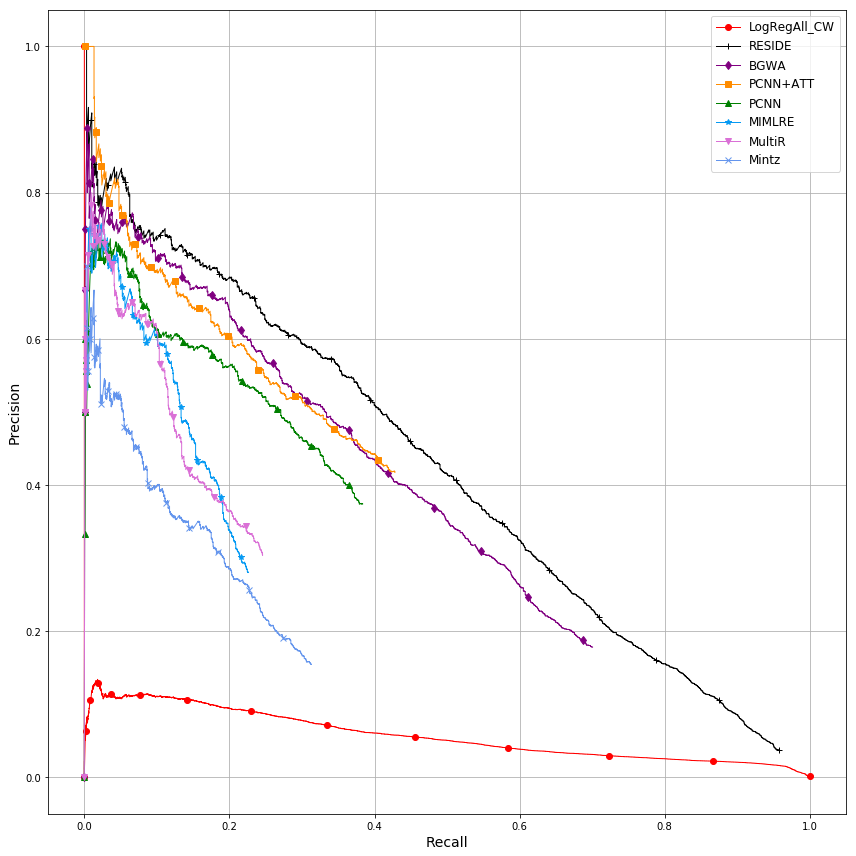

Normalized confusion matrix
Confusion Matrix plot saved at: ../plots/cnf_matrix_LogRegAll_CW.png


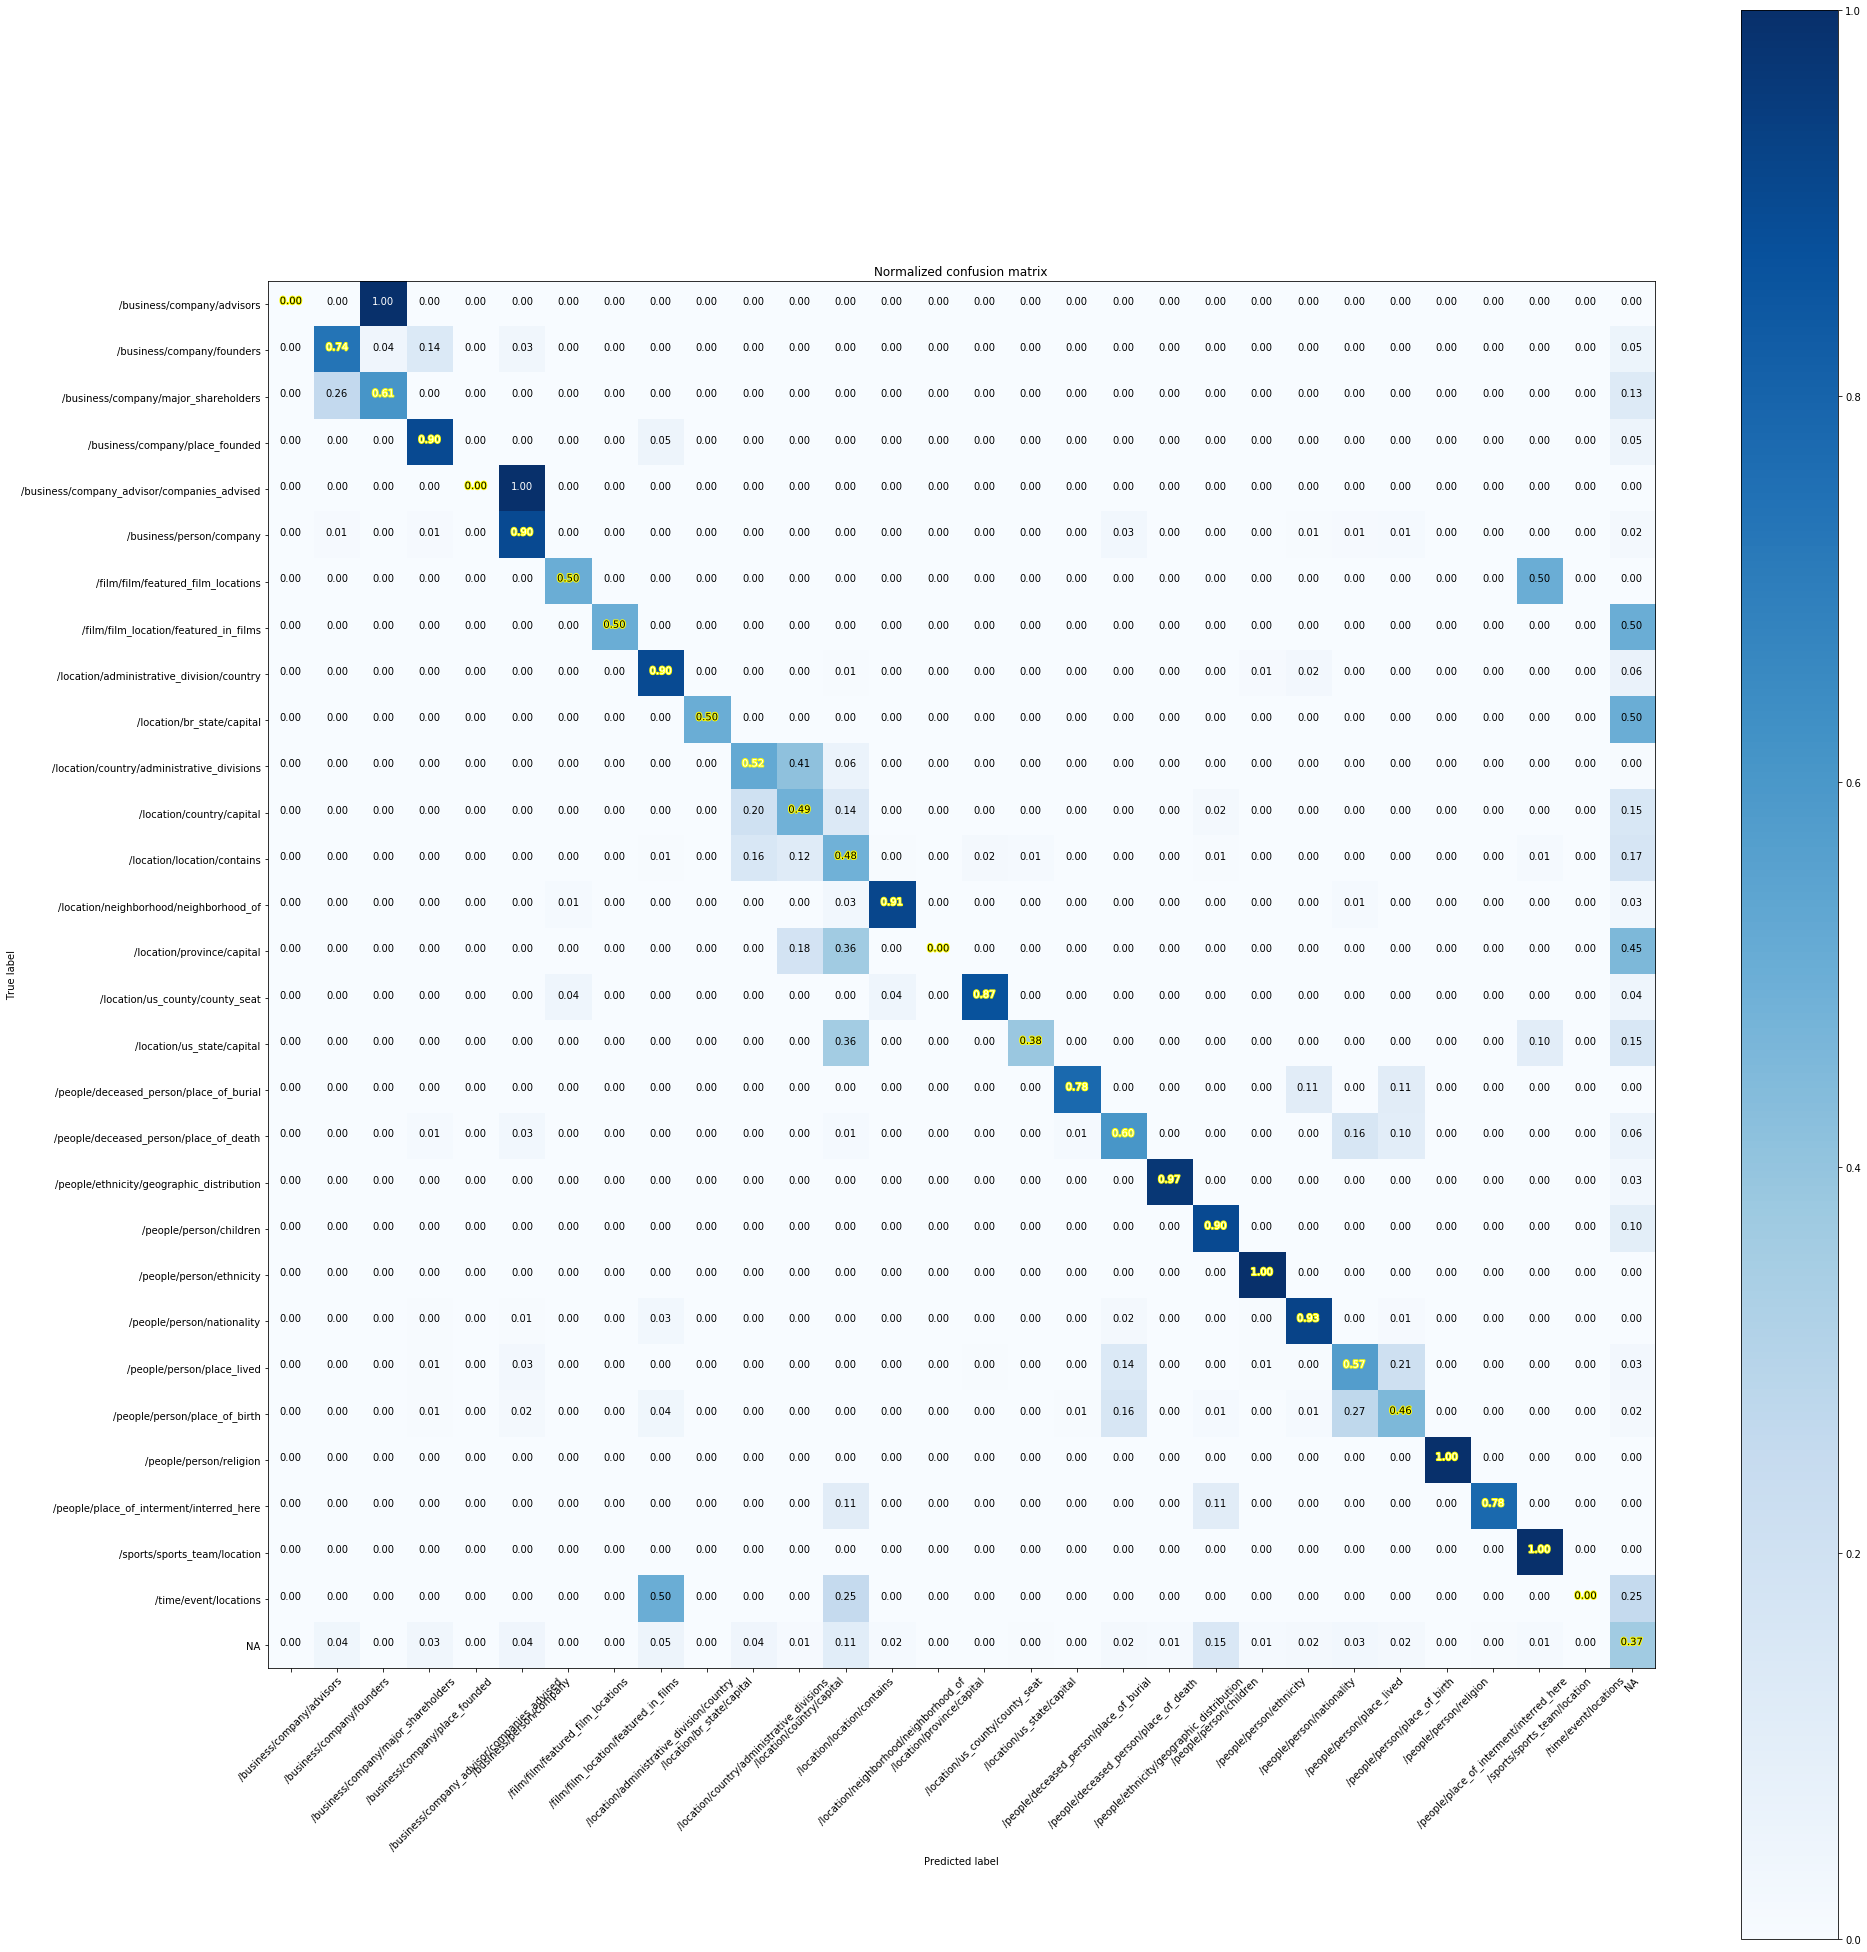

(0.03569656566020733,
 0.6144409937878658,
 0.06747320662515084,
 0.05693182472149738)

In [75]:
# importlib.reload(evaluation)

evaluation.evaluate(
    y_actual=gold_labels.values.reshape(-1, 1),
    y_pred=predicted_labels,
    y_pred_probs=pred_probas,
    classes=classes,
    name=NAME
)